In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maryammanoochehry/car-data")

print("Path to dataset files:", path)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/maryammanoochehry/car-data/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

files = os.listdir(path)
print('Files in dataset:', files)

csv_file = os.path.join(path, files[0])

df = pd.read_csv(csv_file)
df.head()

Files in dataset: ['cardata.csv']


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### About Dataset

The Car Dataset is a comprehensive collection of data related to the sale cars. This dataset contains various attributes that provide valuable insights into the pricing, fuel efficiency, ownership history, and other significant features of the vehicles.

Key Features:
Car Name: The "Car_Name" column provides the names of the different car models available in the dataset, helping us identify and study the various car brands and models.

Year of Manufacture: The "Year" column allows us to analyze the age of the cars, which is an important factor in determining their selling price.

Present Price: The "Present_Price" column indicates the current market price of the cars, which can have a significant impact on their selling price.

Kilometers Driven: The "Kms_Driven" column provides information about the total distance covered by each car, which is another critical factor affecting the selling price.

Fuel Type: The "Fuel_Type" column categorizes the cars based on the type of fuel they use, such as petrol, diesel, or CNG.

Seller Type: The "Seller_Type" column distinguishes between individual sellers and dealerships, which may influence the pricing strategy.

Transmission Type: The "Transmission" column classifies the cars as manual or automatic, which can also affect the selling price.

Owner History: The "Owner" column represents the number of previous owners for each vehicle, which may be a factor considered by potential buyers.

Selling Price: The "Selling_Price" column is the target variable, representing the actual selling price of the used cars. This is the value we aim to predict using the other features.

In [3]:
df.shape

(301, 9)

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.duplicated().sum()

np.int64(2)

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
#Lets try to find the current Age of the car
df['Current_Age'] = 2025 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [10]:
#Lets check Average Kms_Driven per year of each cars
df['Avg_Kms_Driven'] = df['Kms_Driven']/df['Current_Age']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Age,Avg_Kms_Driven
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,2454.545455
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,3583.333333
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,862.500000
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,371.428571
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,3859.090909


<Figure size 1500x600 with 0 Axes>

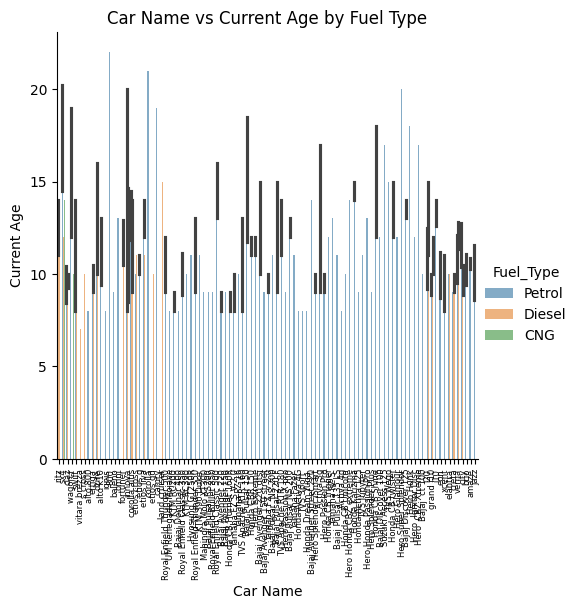

In [11]:
plt.figure(figsize=(15, 6))
sns.catplot(kind='bar', x='Car_Name', y='Current_Age', data=df, hue='Fuel_Type', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Car Name vs Current Age by Fuel Type')
plt.xlabel('Car Name')
plt.ylabel('Current Age')
plt.xticks(rotation=90, fontsize=6)
plt.show()

Text(0, 0.5, 'Count')

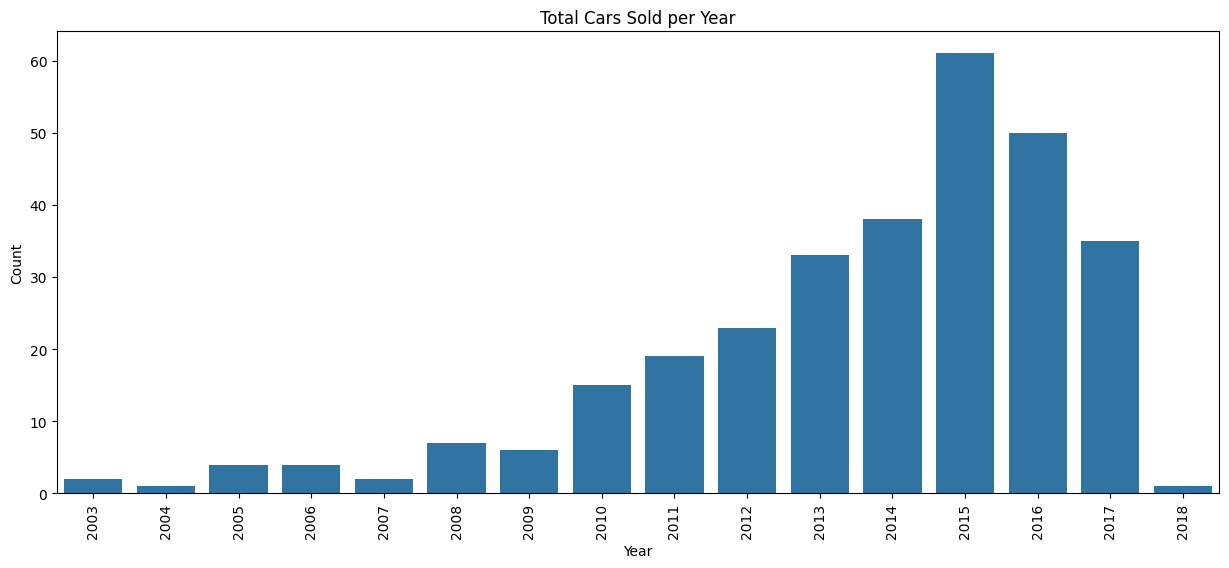

In [12]:
#Lets check the total cars sold as per Years
plt.figure(figsize=(15, 6))
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.title('Total Cars Sold per Year')
plt.xlabel('Year')
plt.ylabel('Count')

It is evident that from 2009, the car sales picked by until 2015 and saw drop from 2016

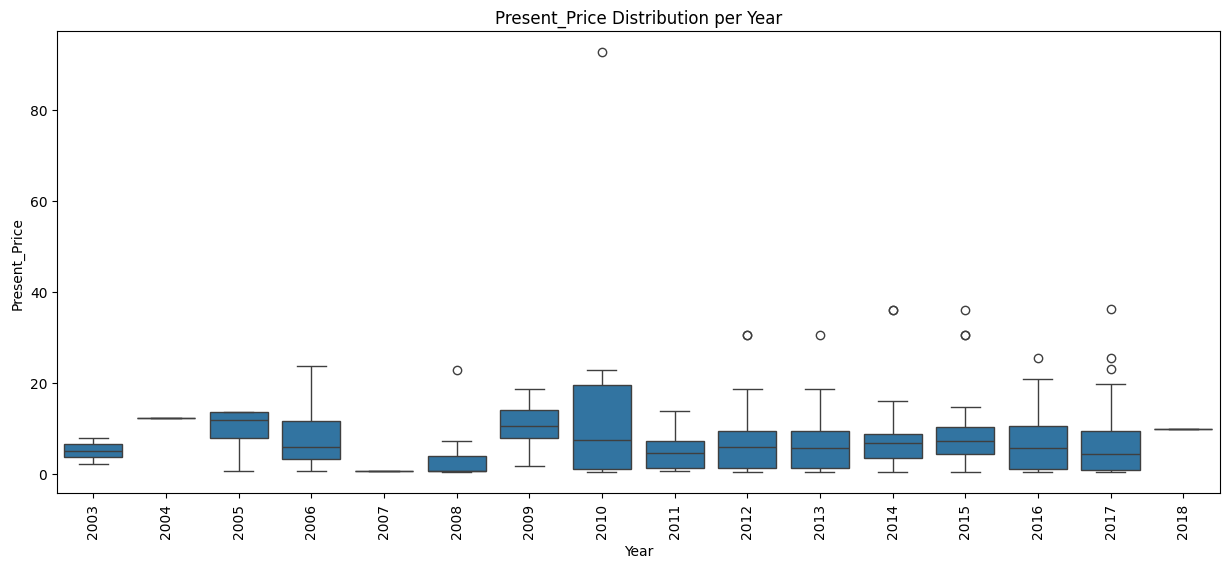

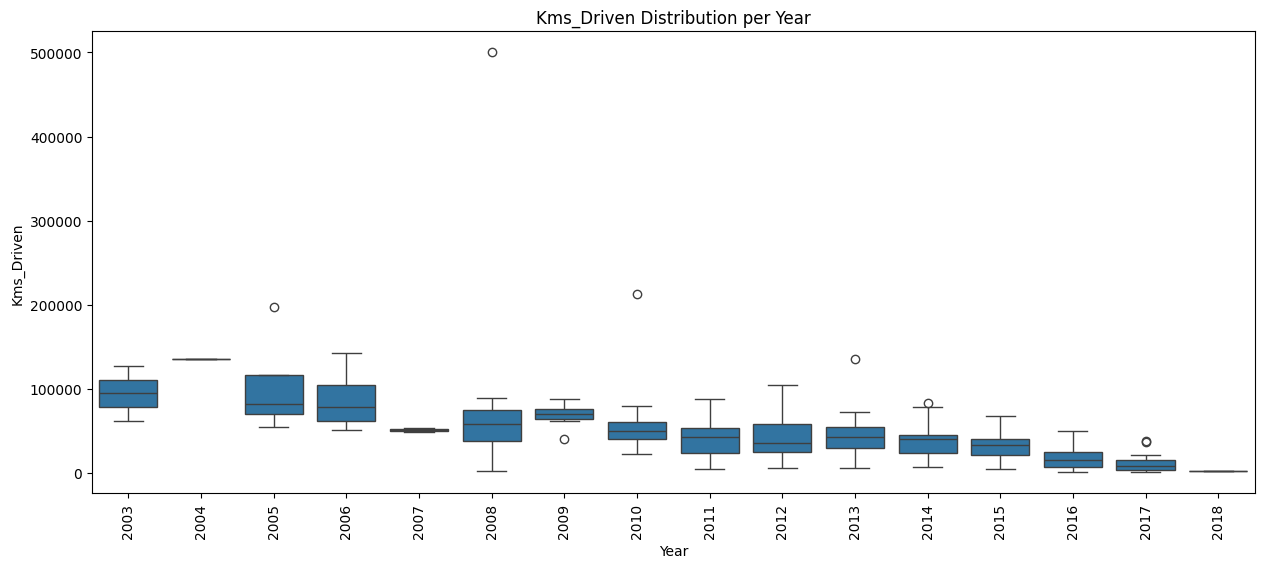

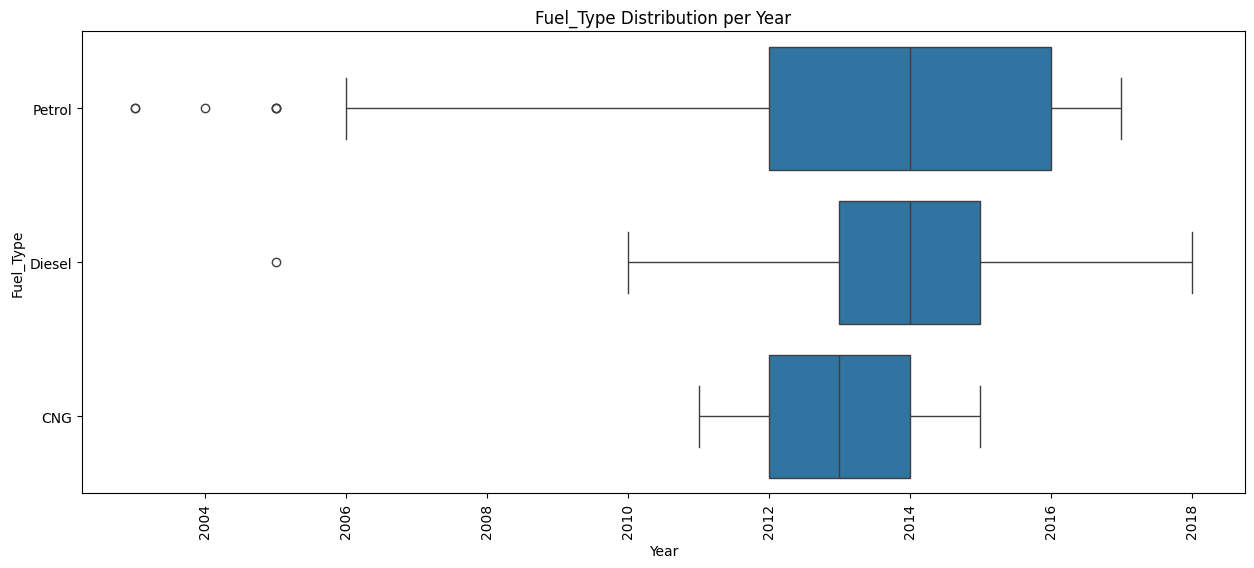

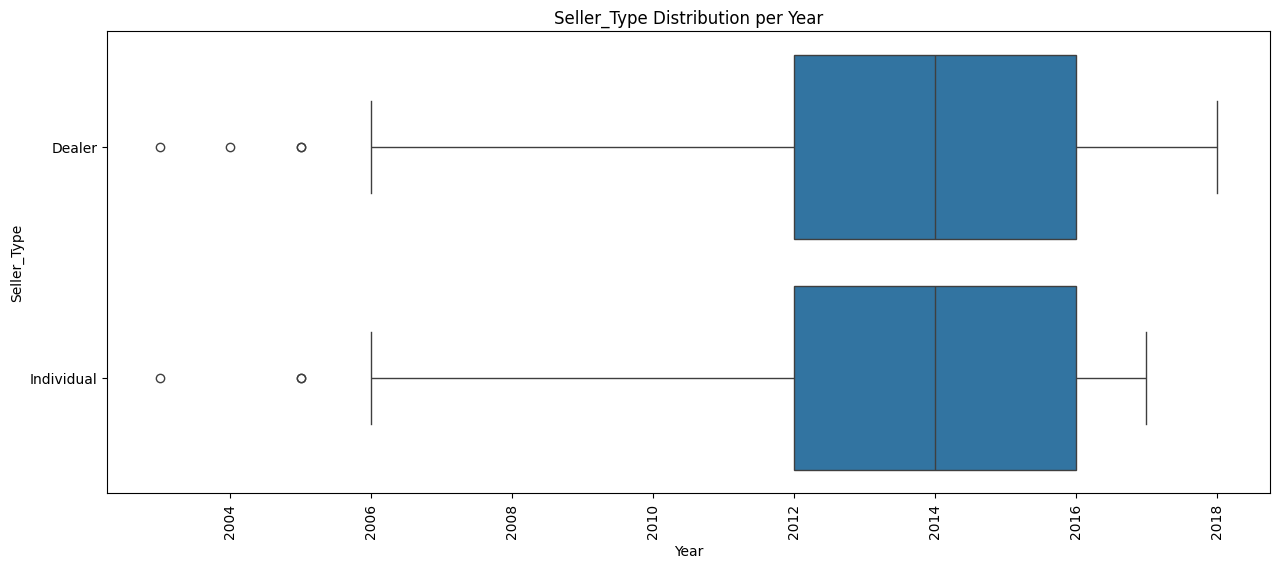

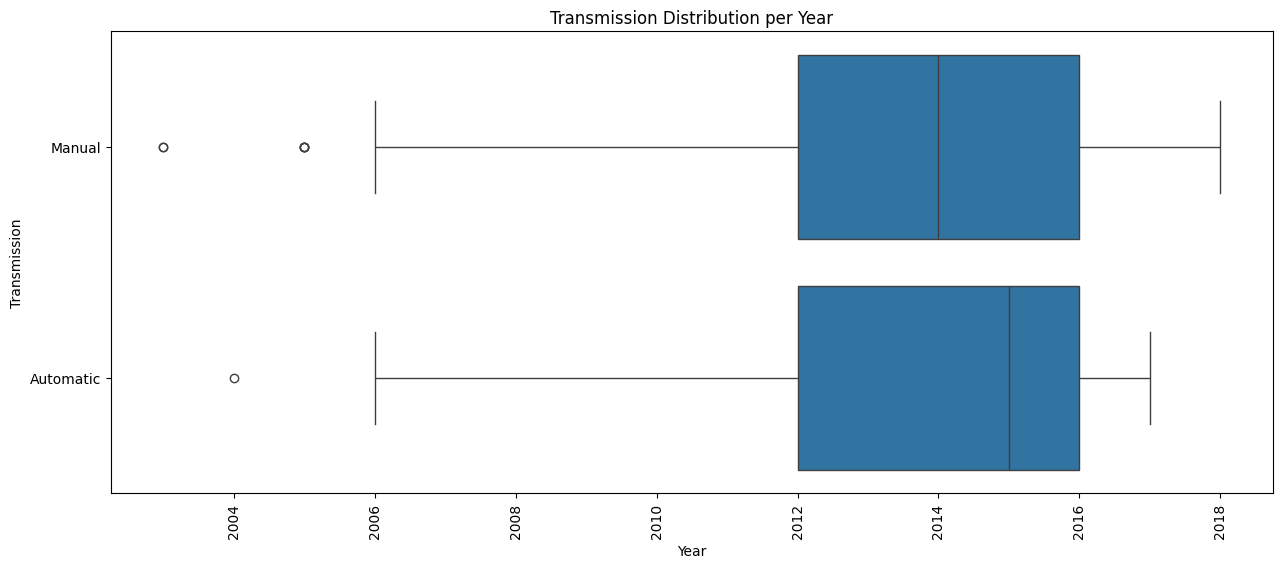

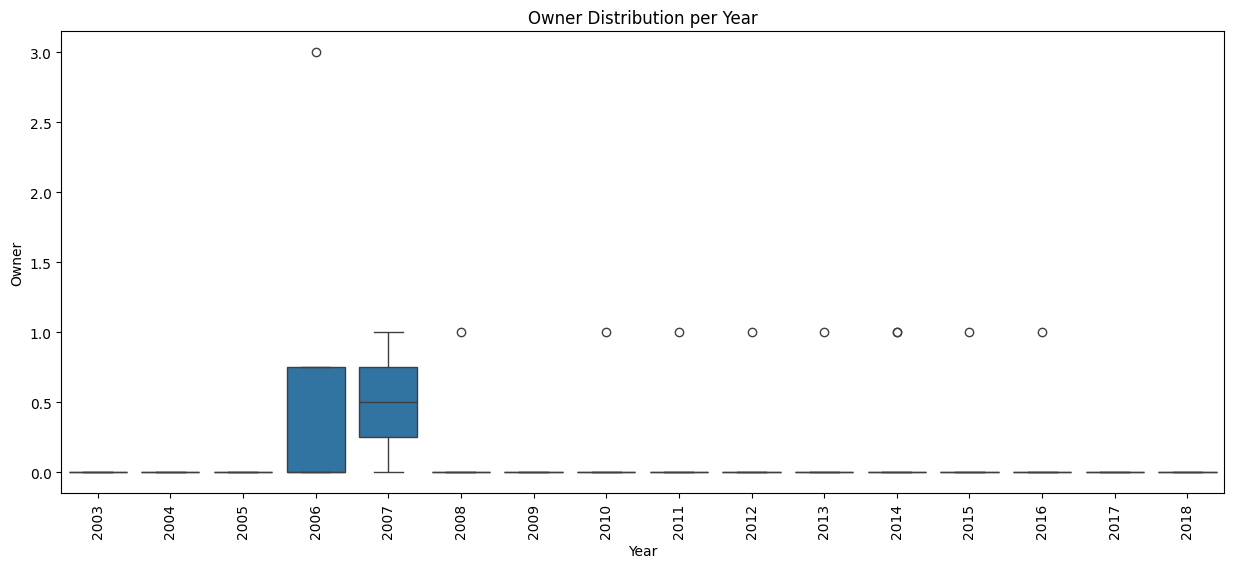

In [13]:
# Analyze the distribution of key features over the years
features = ['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
for feature in features:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Year', y=feature, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{feature} Distribution per Year')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.show()

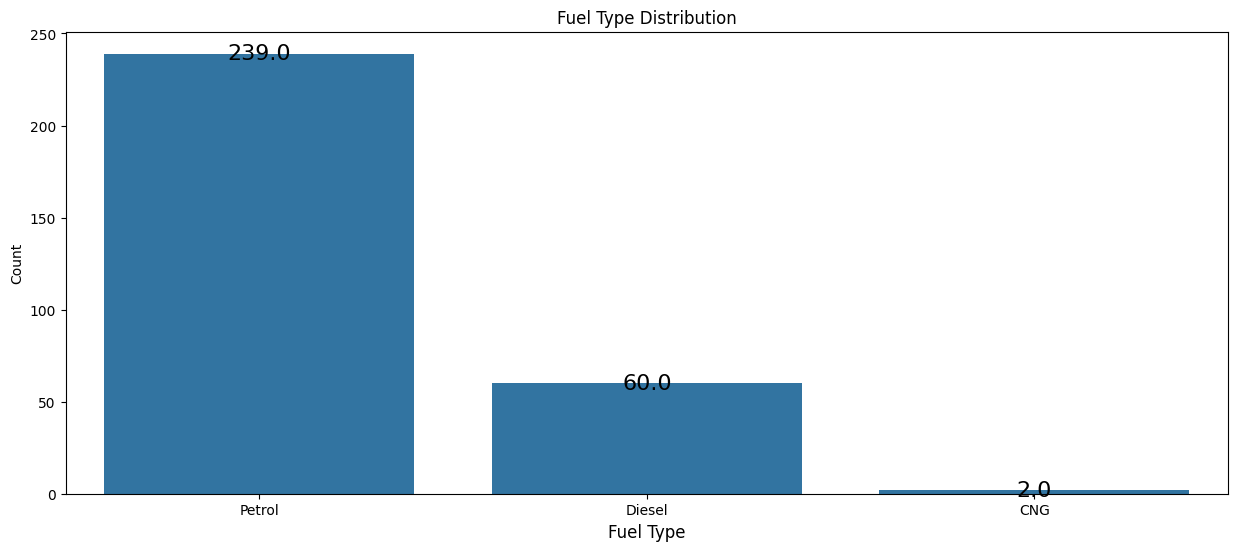

In [14]:
#Lets check the fuel type distribution of cars sold with labels
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Fuel_Type', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='black')

plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count')
plt.show()

In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Current_Age',
       'Avg_Kms_Driven'],
      dtype='object')

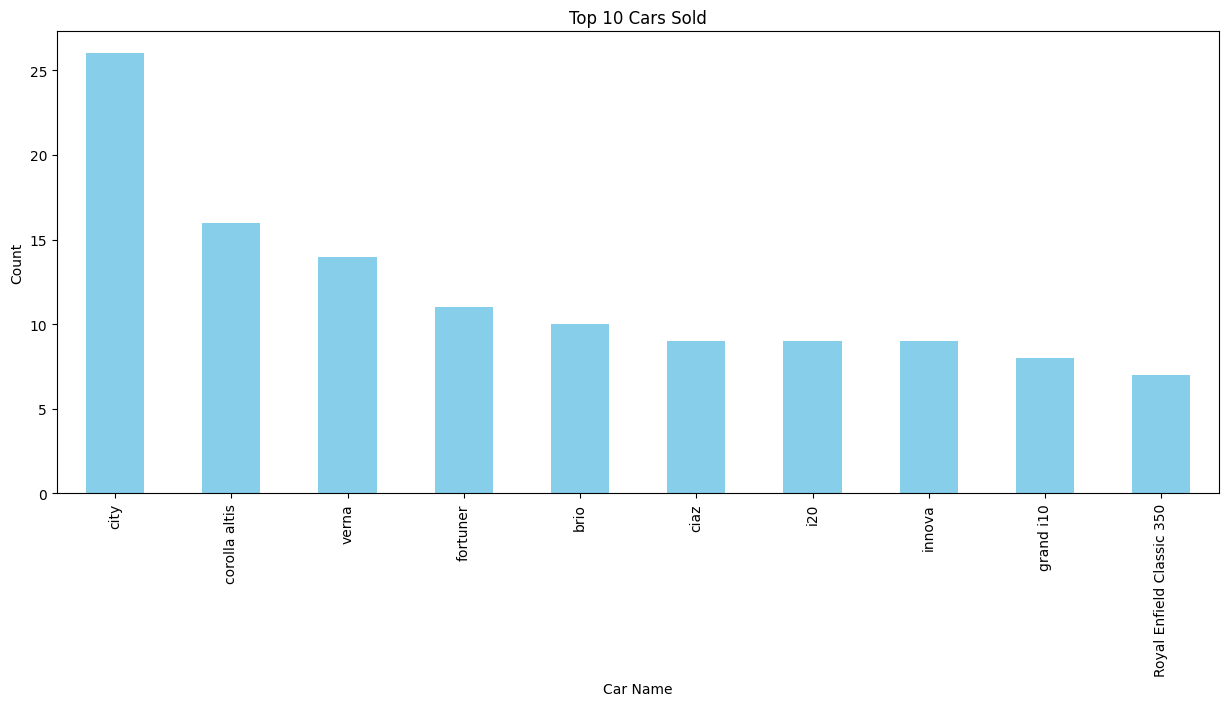

In [16]:
# Lets check and plot which cars have been sold most, top 10 cars
plt.figure(figsize=(15, 6))
top_10_cars = df['Car_Name'].value_counts().head(10)
top_10_cars.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cars Sold')
plt.xlabel('Car Name') 
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Age,Avg_Kms_Driven
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,2454.545455
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,3583.333333
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,862.500000
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,371.428571
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,3859.090909


<Axes: xlabel='Car_Name'>

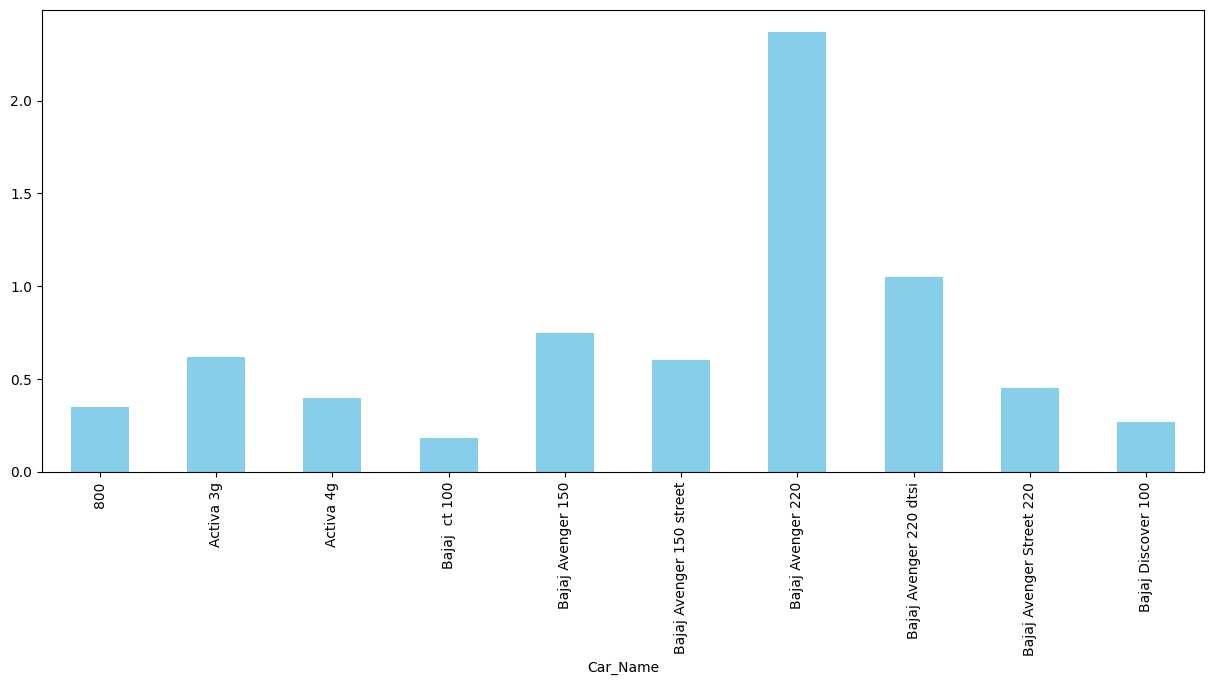

In [18]:
# Lets check the total value of cars sold in each year
df.groupby('Car_Name')['Selling_Price'].sum().head(10).plot(kind='bar', color='skyblue', figsize=(15, 6))


Although 'City' was the top selling car, but by selling price 'Bajaj Avenger 220' was the maximum revenue generation model, This shows that this dataset has both car and 2-wheelers as well

In [19]:
df['Vehicle_Type'] = df['Selling_Price'].apply(lambda x: '2 Wheeler' if x < 1 else '4 Wheeler')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Age,Avg_Kms_Driven,Vehicle_Type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,2454.545455,4 Wheeler
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,3583.333333,4 Wheeler
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,862.500000,4 Wheeler
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,371.428571,4 Wheeler
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,3859.090909,4 Wheeler


In [23]:
# Lets check the Vehicle types
df['Vehicle_Type'].value_counts()

Vehicle_Type
4 Wheeler    223
2 Wheeler     78
Name: count, dtype: int64

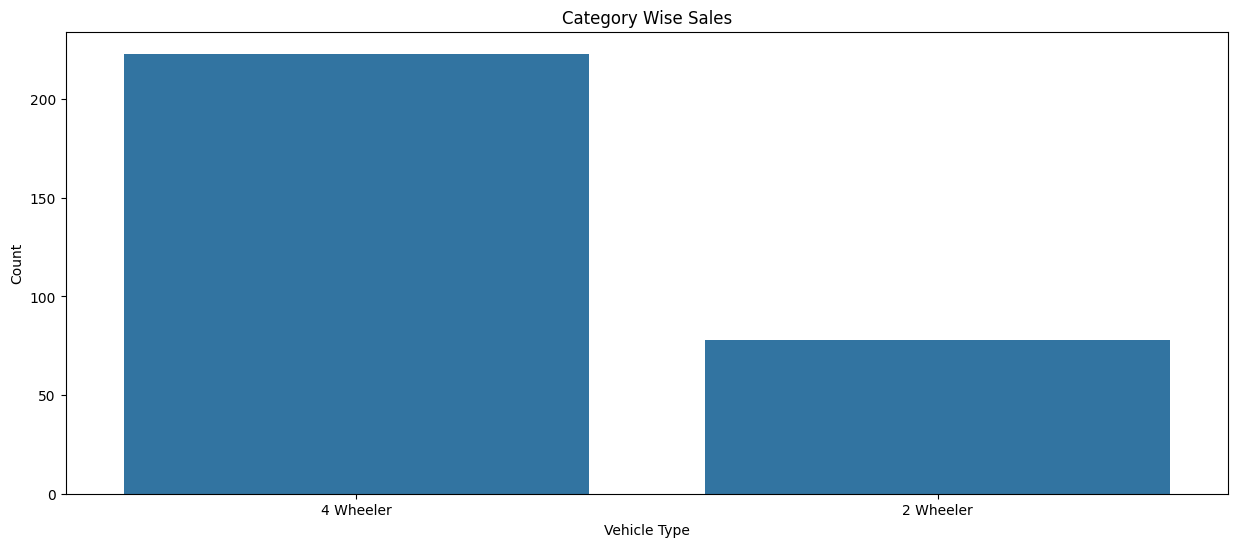

In [22]:
#Lets check category wise sales
plt.figure(figsize=(15, 6))
sns.countplot(x='Vehicle_Type', data=df)
plt.title('Category Wise Sales')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()